### summary 

1. store all csv files into a local database
2. exploratory data analysis

In [1]:
import os
import pandas as pd
import time
import numpy as np
import re
import sqlite3 as lite
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

In [3]:
conProject = lite.connect('project.db')  

In [37]:
import glob
extension = 'csv'
result = [i for i in glob.glob('*.{}'.format(extension))]

for file in result:    
    data = pd.read_csv(file, sep=',')
    name = file.split('.')[0]
    print(name)
    print(data.head()) 
    record_cnt = data.shape[0] 
    print(record_cnt)
    print('-----------------------')
    data.to_sql(name=name, con=conProject, flavor='sqlite', if_exists='replace')

known_opponents
           uid
0  19157958576
1   1921037064
2  19523424409
3   1985936339
4   1997209536
11379
-----------------------
known_supporters
      PRIMARYID
0   19522903378
1   19522675673
2      37617112
3  3470FR176519
4      50765848
105134
-----------------------
model_probabilities
           uid  local_schools__good  local_schools__fair  local_schools__poor  \
0  19101063480             0.177226             0.309224             0.513550   
1  19101122779             0.318363             0.497278             0.184359   
2  19101930697             0.259784             0.513264             0.226952   
3  19102226061             0.326893             0.510956             0.162151   
4  19104235280             0.264571             0.413334             0.322095   

   vote__candidateA  vote__other  vote__candidateB  ideology__conservative  \
0          0.286004     0.254312          0.459684                0.571222   
1          0.250517     0.097125          0.652358       

C:\Users\Miya\Anaconda3\lib\site-packages\pandas\core\generic.py:1165: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


uid_to_household_key
           uid household_key
0  19205437418  19-192265379
1  19418806098  19-192265368
2  19526898264  19-192265470
3  19523377311  19-192265425
4  19522932867  19-192265429
452223
-----------------------
voter_file
           uid   age  avghomevalue  avgincome  edu_cg  edu_gd  edu_hsg  \
0  19522840044  61.0        656249     160770      40      12       22   
1  19251264405  57.0        656249     160770      40      12       22   
2  19269989178  64.0        656249     160770      40      12       22   
3  19526179466  91.0        656249     160770      40      12       22   
4  19140377533  50.0        656249     160770      40      12       22   

   edu_nhsg  edu_sc voted_statewide_primary_2012     ...       \
0        10      26                            N     ...        
1        10      26                            A     ...        
2        10      26                            A     ...        
3        10      26                            A     ...  

In [7]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select sql from sqlite_master where type = 'table' and name = 'voter_file'""")
    desc = cur.fetchall()
    print(desc)

[('CREATE TABLE "voter_file" (\n"index" INTEGER,\n  "uid" INTEGER,\n  "age" REAL,\n  "avghomevalue" INTEGER,\n  "avgincome" INTEGER,\n  "edu_cg" INTEGER,\n  "edu_gd" INTEGER,\n  "edu_hsg" INTEGER,\n  "edu_nhsg" INTEGER,\n  "edu_sc" INTEGER,\n  "voted_statewide_primary_2012" TEXT,\n  "voted_statewide_general_2012" TEXT,\n  "voted_municipal_primary_2013" TEXT,\n  "voted_municipal_general_2013" TEXT,\n  "voted_statewide_primary_2014" TEXT,\n  "voted_statewide_general_2014" TEXT,\n  "voted_municipal_primary_2015" TEXT,\n  "voted_municipal_general_2015" TEXT,\n  "voted_statewide_primary_2016" TEXT,\n  "home" TEXT,\n  "ismarried" TEXT,\n  "neighborhood" INTEGER,\n  "party" TEXT,\n  "sex" TEXT,\n  "whitecollarp" INTEGER\n)',)]


In [74]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select sql from sqlite_master where type = 'table' and name = 'known_supporters'""")
    desc = cur.fetchall()
    print(desc)

[('CREATE TABLE "known_supporters" (\n"index" INTEGER,\n  "PRIMARYID" TEXT\n)',)]


In [86]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select sql from sqlite_master where type = 'table' and name = 'model_probabilities'""")
    desc = cur.fetchall()
    print(desc)

[('CREATE TABLE "model_probabilities" (\n"index" INTEGER,\n  "uid" INTEGER,\n  "local_schools__good" REAL,\n  "local_schools__fair" REAL,\n  "local_schools__poor" REAL,\n  "vote__candidateA" REAL,\n  "vote__other" REAL,\n  "vote__candidateB" REAL,\n  "ideology__conservative" REAL,\n  "ideology__liberal" REAL,\n  "ideology__moderate" REAL,\n  "ideology__progressive" REAL,\n  "issueA__no_concerns" REAL,\n  "issueA__serious_concerns" REAL,\n  "issueA__some_concerns" REAL,\n  "issueB__no_concerns" REAL,\n  "issueB__serious_concerns" REAL,\n  "issueB__some_concerns" REAL,\n  "turnout" REAL,\n  "persuadability__score" REAL,\n  "job_performance__candidateB" REAL\n)',)]


In [76]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select sql from sqlite_master where type = 'table' and name = 'phone_bank'""")
    desc = cur.fetchall()
    print(desc)

[('CREATE TABLE "phone_bank" (\n"index" INTEGER,\n  "Date" TEXT,\n  "Total Calls" INTEGER,\n  "Total Connects" INTEGER,\n  "Total Agree" INTEGER,\n  "Total Undecided" INTEGER,\n  "Total Volunteer" INTEGER\n)',)]


In [87]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select sql from sqlite_master where type = 'table' and name = 'uid_to_household_key'""")
    desc = cur.fetchall()
    print(desc)

[('CREATE TABLE "uid_to_household_key" (\n"index" INTEGER,\n  "uid" INTEGER,\n  "household_key" TEXT\n)',)]


In [78]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select sql from sqlite_master where type = 'table' and name = 'known_opponents'""")
    desc = cur.fetchall()
    print(desc)

[('CREATE TABLE "known_opponents" (\n"index" INTEGER,\n  "uid" INTEGER\n)',)]


#### Slide 1: Population overviewSummarize the overall electorate on the following variables: 

age, income, party,ideology, and charter school support. Present the client with both counts and percentages.

In [44]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select count(uid),count(distinct uid) from voter_file""")
    duplicate = cur.fetchall()
    print(duplicate)

[(434624, 434624)]


In [45]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select count(uid),count(distinct uid) from model_probabilities""")
    duplicate = cur.fetchall()
    print(duplicate)

[(452223, 452223)]


In [29]:
with conProject:
    cur = conProject.cursor()
    cur.execute(""" select cssupport, count(*),printf("%.4f", count(*)/(select count(uid)*1.0 from model_probabilities)) from
    (select uid, CASE max(local_schools__good, local_schools__fair, local_schools__poor)
          WHEN local_schools__good      THEN 'supporter'
          WHEN local_schools__fair     THEN 'neutral'
          WHEN local_schools__poor    THEN 'opponent'
          END AS cssupport from model_probabilities) 
    group by cssupport""") 
    cssupport = cur.fetchall()
    print(cssupport)

[('neutral', 403056, '0.8913'), ('opponent', 45151, '0.0998'), ('supporter', 4016, '0.0089')]


In [4]:
pd.DataFrame(cssupport,columns = ['cs','cnt','pct']).dropna()

,cs,cnt,pct
0,neutral,403056,0.8913
1,opponent,45151,0.0998
2,supporter,4016,0.0089


In [20]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select age from voter_file""")
    age = cur.fetchall()
age_df = pd.DataFrame(age,columns = ['age']).dropna()
sum(age_df['age']>=65)/age_df.count()

age    0.20371
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000506F0F2860>]], dtype=object)

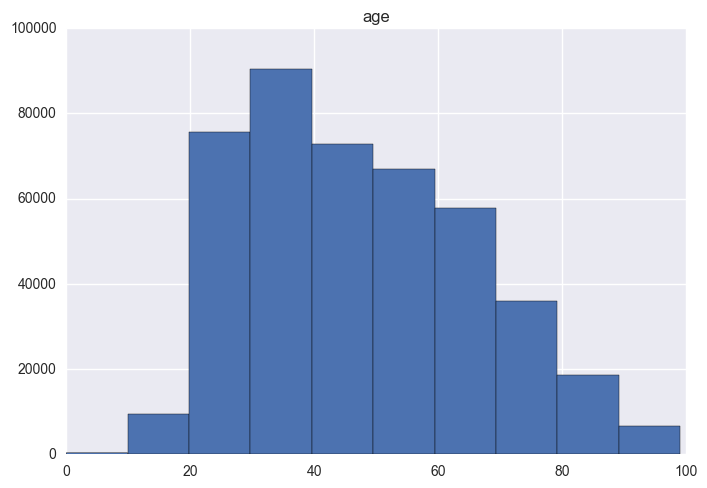

In [21]:
age_df.hist()

In [9]:
sum(age_df['age']<35)/age_df.count()

age    0.308089
dtype: float64

In [22]:
import numpy as np
count, division = np.histogram(age_df['age'],bins = [0,20,40,60,80,100])
count/sum(count)

array([ 0.02273208,  0.38186818,  0.32156763,  0.21601924,  0.05781286])

In [23]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select party,count(party),printf("%.4f", count(party)/(select count(uid)*1.0 from voter_file)) from voter_file group by party""")
    party = cur.fetchall()
party_df = pd.DataFrame(party,columns = ['party','cngt','pct']).dropna()
party_df.sort_values('pct',ascending = False)

,party,cngt,pct
1,D,232145,0.5341
2,DS,112394,0.2586
7,R,69532,0.1600
0,AI,9508,0.0219
8,YY,4175,0.0096
4,LI,3135,0.0072
3,GR,2390,0.0055
6,PF,1183,0.0027
5,NL,162,0.0004


In [24]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select table1.uid, avgincome, household_key from uid_to_household_key join 
    (select voter_file.uid,avgincome from voter_file) as table1
    where uid_to_household_key.uid = table1.uid""")
    income = cur.fetchall()
income_df = pd.DataFrame(income,columns = ['uid','income','household']).dropna()

In [25]:
sum(income_df['income']>100000)/income_df.count()

uid          0.724074
income       0.724074
household    0.724074
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000507992D8D0>]], dtype=object)

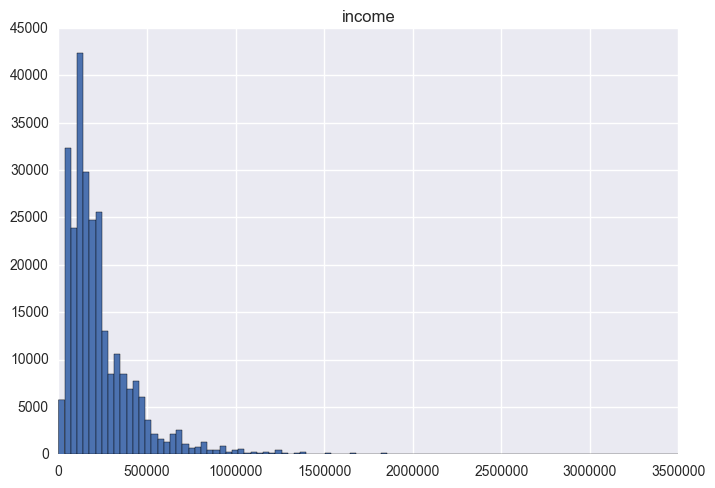

In [26]:
income_df[['income','household']].groupby('household').sum().hist(bins = 100)

In [27]:
count, division = np.histogram(income_df['income'],bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000])

In [28]:
count/sum(count)

array([ 0.06626417,  0.20966168,  0.30873583,  0.2003847 ,  0.14349415,
        0.02813466,  0.01759222,  0.00375267,  0.01111075,  0.00478114,
        0.00472592,  0.0013621 ])

In [29]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select ideology, count(ideology),printf("%.4f", count(ideology)/(select count(uid)*1.0 from model_probabilities)) from 
    (select uid, CASE max(ideology__conservative, ideology__liberal, ideology__moderate, ideology__progressive)
          WHEN ideology__conservative      THEN 'conservative'
          WHEN ideology__liberal     THEN 'liberal'
          WHEN ideology__moderate    THEN 'moderate'
          WHEN ideology__progressive      THEN 'progressive'
          END AS ideology from model_probabilities) group by ideology """)
    ideology = cur.fetchall()
ideology_df = pd.DataFrame(ideology,columns = ['ideology','cnt','pct']).dropna()
ideology_df.head()

,ideology,cnt,pct
0,conservative,35068,0.0775
1,liberal,179797,0.3976
2,moderate,88855,0.1965
3,progressive,148503,0.3284


Slide 2: Two target populations for a mailer The client is interested in sending a piece of direct mail to charter school supporters, but the budget for the mailer is flexible. We have a list of charter school parents, who we want to contact for sure. Additionally, we have produced models to estimate the likelihood that each person in the dataset is a charter school supporter. Joining different tables as necessary, generate two potential target lists, one larger than the other. Describe your criteria for inclusion in each list. Be sure to de-duplicate each list to ensure that we’re only sending a single piece of mail to each household. Provide final household-level counts for both target lists. Using your best judgment, explain why the client should choose one or the other list.

In [30]:
# larger universe
with conProject:
    cur = conProject.cursor()
    cur.execute("""select distinct uid, household_key from uid_to_household_key
    where household_key not in (select distinct household_key from uid_to_household_key
    where uid in
    (select uid from 
        (select model_probabilities.uid, CASE max(local_schools__good, local_schools__fair, local_schools__poor)
          WHEN local_schools__good      THEN 'supporter'
          WHEN local_schools__fair     THEN 'neutral'
          WHEN local_schools__poor    THEN 'opponent'
          END AS cssupport from model_probabilities
          WHERE cssupport = 'opponent')
          UNION 
        select uid from known_opponents))""")
    uid_support = cur.fetchall()
support = pd.DataFrame(uid_support,columns = ['uid','key']).dropna()
support.head()

,uid,key
0,19205437418,19-192265379
1,19418806098,19-192265368
2,19526898264,19-192265470
3,19523377311,19-192265425
4,19522932867,19-192265429


In [31]:
support.groupby('key').count().count()

uid    244057
dtype: int64

In [32]:
# smaller universe
with conProject:
    cur = conProject.cursor()
    cur.execute("""select distinct uid, household_key from uid_to_household_key
    where household_key not in (select distinct household_key from uid_to_household_key
    where uid in 
    (select uid from 
        (select model_probabilities.uid from model_probabilities
          WHERE  local_schools__good <= local_schools__poor)
          UNION 
        select uid from known_opponents))""")
    uid_support2 = cur.fetchall()
support2 = pd.DataFrame(uid_support2,columns = ['uid','key']).dropna()
support2.head()

,uid,key
0,19205437418,19-192265379
1,19418806098,19-192265368
2,19523377311,19-192265425
3,19522932867,19-192265429
4,19525602224,19-192265387


In [33]:
support2.groupby('key').count().count()

uid    193239
dtype: int64

In [5]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select uid, CASE max(local_schools__good, local_schools__fair, local_schools__poor)
          WHEN local_schools__good      THEN 'supporter'
          WHEN local_schools__fair     THEN 'neutral'
          WHEN local_schools__poor    THEN 'opponent'
          END AS cssupport from model_probabilities""")
    uid_support = cur.fetchall()
cs = pd.DataFrame(uid_support,columns = ['uid','cssupport']).dropna()
cs.head()

,uid,cssupport
0,19101063480,opponent
1,19101122779,neutral
2,19101930697,neutral
3,19102226061,neutral
4,19104235280,neutral


In [45]:
pd.merge(cs, support, on='uid').groupby('cssupport').count()

,uid,key
cssupport,,
neutral,384056,384056
supporter,3659,3659


In [46]:
pd.merge(cs, support2, on='uid').groupby('cssupport').count()

,uid,key
cssupport,,
neutral,298669,298669
supporter,3362,3362


In [50]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select uid, CASE max(ideology__conservative, ideology__liberal, ideology__moderate, ideology__progressive)
          WHEN ideology__conservative      THEN 'conservative'
          WHEN ideology__liberal     THEN 'liberal'
          WHEN ideology__moderate    THEN 'moderate'
          WHEN ideology__progressive      THEN 'progressive'
          END AS ideology from model_probabilities""")
    ideology = cur.fetchall()
ideology_df = pd.DataFrame(ideology,columns = ['uid','ideology']).dropna()
ideology_df.head()

,uid,ideology
0,19101063480,conservative
1,19101122779,liberal
2,19101930697,progressive
3,19102226061,moderate
4,19104235280,moderate


In [57]:
pd.merge(ideology_df, support2, on='uid').groupby('ideology').count()['uid']/pd.merge(ideology_df, support2, on='uid').groupby('ideology').count()['uid'].sum()

ideology
conservative    0.003953
liberal         0.473534
moderate        0.106363
progressive     0.416149
Name: uid, dtype: float64

In [56]:
pd.merge(ideology_df, support, on='uid').groupby('ideology').count()['uid']/pd.merge(ideology_df, support, on='uid').groupby('ideology').count()['uid'].sum()

ideology
conservative    0.022021
liberal         0.439413
moderate        0.167177
progressive     0.371389
Name: uid, dtype: float64

Slide 3: No-Contact listWe have a list of members of teachers unions, who we want to avoid contacting, but the list contains only partial profiles. Match across the appropriate datasets to generate a final listof no-contact individuals and no-contact households. Then give a demographic overview of the no-contact list. 

In [58]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select distinct uid from known_opponents""")
    uid_opp = cur.fetchall()
opp = pd.DataFrame(uid_opp,columns = ['uid']).dropna()
len(opp)

11022

In [59]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select distinct uid, household_key from uid_to_household_key
    where uid in
    (select uid from 
        (select model_probabilities.uid, CASE max(local_schools__good, local_schools__fair, local_schools__poor)
          WHEN local_schools__good      THEN 'supporter'
          WHEN local_schools__fair     THEN 'neutral'
          WHEN local_schools__poor    THEN 'opponent'
          END AS cssupport from model_probabilities
          WHERE cssupport = 'opponent')
          UNION 
        select uid from known_opponents)""")
    uid_opp = cur.fetchall()
opp = pd.DataFrame(uid_opp,columns = ['uid','key']).dropna()
opp.head()

,uid,key
0,1917882007,19-192264923
1,19146194214,19-192264982
2,19524839782,19-192256997
3,19414232160,19-192256670
4,19526900053,19-192256655


In [60]:
opp.groupby('key').count().count()

uid    31985
dtype: int64

In [61]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select model_probabilities.uid, local_schools__poor,CASE max(local_schools__good, local_schools__fair, local_schools__poor)
          WHEN local_schools__good      THEN 'supporter'
          WHEN local_schools__fair     THEN 'neutral'
          WHEN local_schools__poor    THEN 'opponent'
          END AS cssupport from model_probabilities
          WHERE cssupport = 'opponent'""")
    uid_opp = cur.fetchall()
opp = pd.DataFrame(uid_opp,columns = ['uid','prob','cssupport']).dropna()
opp.head()

,uid,prob,cssupport
0,19101063480,0.513550,opponent
1,19112162162,0.467229,opponent
2,19117554956,0.557661,opponent
3,1911986873,0.413936,opponent
4,19120290600,0.390649,opponent


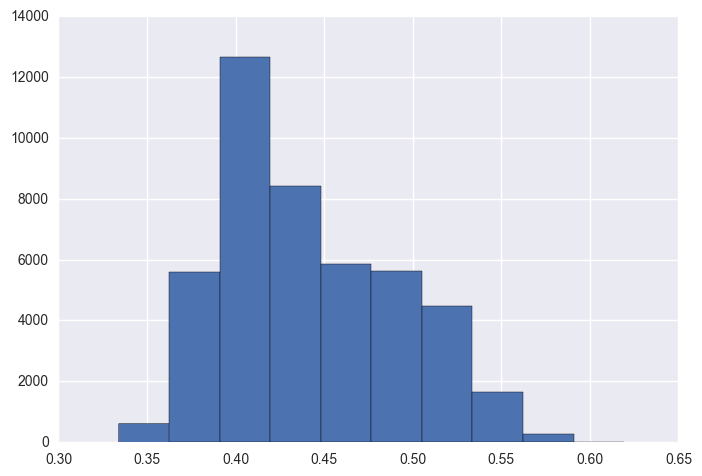

In [62]:
opp['prob'].hist()

In [63]:
with conProject:
    cur = conProject.cursor()
    cur.execute("""select uid,age,avgincome,party from voter_file where uid in 
    (select uid from 
        (select model_probabilities.uid, CASE max(local_schools__good, local_schools__fair, local_schools__poor)
          WHEN local_schools__good      THEN 'supporter'
          WHEN local_schools__fair     THEN 'neutral'
          WHEN local_schools__poor    THEN 'opponent'
          END AS cssupport from model_probabilities
          WHERE cssupport = 'opponent')
          UNION 
        select uid from known_opponents)""")
    uid_opp = cur.fetchall()
opp = pd.DataFrame(uid_opp,columns = ['uid','age','income','party']).dropna()
opp.head()

,uid,age,income,party
0,19527796454,27.0,160770,R
1,19526113717,61.0,160770,R
2,19525237452,27.0,177682,R
3,19526044160,57.0,177682,R
4,19524446329,39.0,177682,R


In [64]:
opp.groupby('party').count()

,uid,age,income
party,,,
AI,760,760,760
D,4473,4473,4473
DS,7319,7319,7319
GR,69,69,69
LI,163,163,163
NL,7,7,7
PF,30,30,30
R,32446,32446,32446
YY,353,353,353


In [65]:
count, division = np.histogram(opp['income'],bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000])

In [66]:
count, division = np.histogram(opp['age'],bins = [0,20,40,60,80,100])